# A Tutorial on How to Visually Explore Cancer Data
Stacey Rivet Beck 11/25/2019

## Visualization Technique

Bubble charts pack in a lot of information as a visualization.  A bubble chart is good to look at three points of data at least (we will go with 5 points of data).  With correlations, for instance, you can see the relationship between an x value and a y value, and then the area of each marker (or point) holds another value shared between the two x and y values.  

My original plan was to use a scatter plot for correlating my data, however, this data is discrete in that the data are counts for numbers of something.  This does not look so nice and in some cases does not really have an impact on telling a story with the data since some repeat data values will be lost (layered on top of eachother at the same point).  One way to get around discrete data is to use a bubble chart and to set the area of the bubble (bubble size) to the number of data points at that particular coordinate on the graph.  This helps with highlighting the data the sits beneath other points. Using a log scale along the x-axis will also help with visualizing the data points. 

Below is what I want to achieve, and I will walk you through how to get there. 

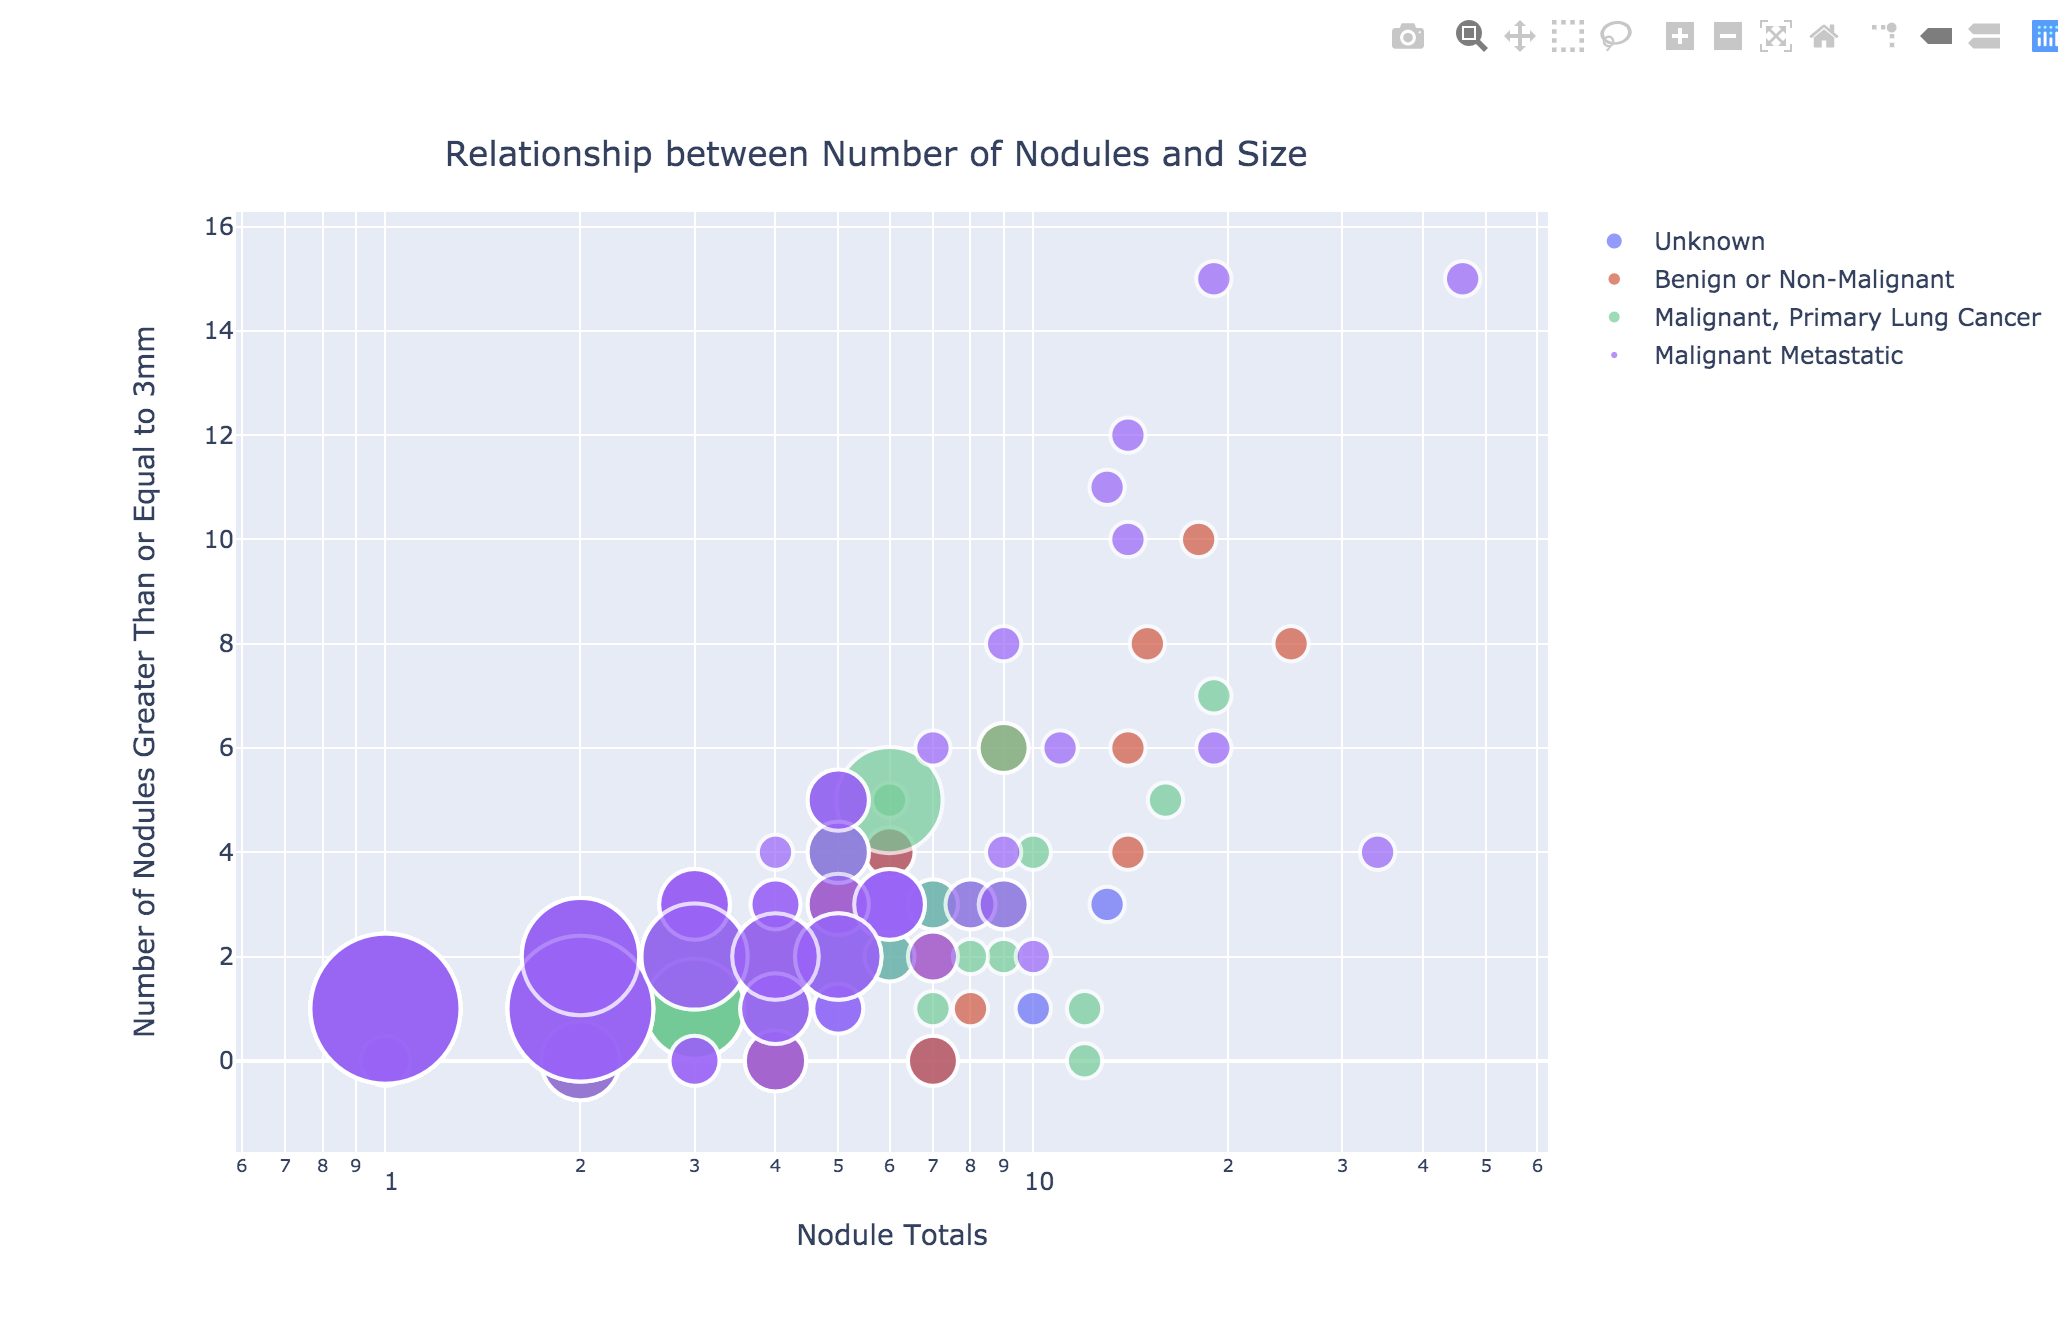

# Visualization Library

We are going to use Plotly as the library to visualize our data in a bubble chart.  It is a good choice library since it includes Dash, which is open sourced which supports Python and uses Javascript as well as D3.js for building analytic visualizations. Plotly was designed to work well in the Jupyter Notebook environment. Along with that, their API libraries as well as figure converters make it possible to provide better interactive capabilities as well as nicer looking graphs more efficiently.  Plotly was founded by Alex Johnson, Jack Parmer, Chris Parmer, and Matthew Sundquist in Montreal Quebec in 2012.  

Ployly is declarative and can create and share interactive charts with other languages that understand the the JSON schema.  It runs on Javascript can be difficult at times to manage fine tuning certain aspects of your graph if the output was not exactly desired.  

Ultimately, I chose Plotly for it's beautiful chart quality and interactive capabilities.  I like that you can import chart studio to send the chart to your personal plotly account if you so desire.    


To get started , open the terminal and pip or conda install:

- $ pip install plotly==4.3.0

- $ conda install -c plotly plotly=4.3.0

If you wish to use it in classic Jupyter Notebooks, you can pip or conda install then type 'jupyter notebook' in the terminal to open jupyter notebooks locally:

- $ pip install "notebook>=5.3" "ipywidgets>=7.2"


- $ conda install "notebook>=5.3" "ipywidgets>=7.2"


- $ jupyter notebook

Static image support requires download of orca and one clean way to manage this is by a conda install:

- $ conda install -c plotly plotly-orca psutil requests

# Demonstration
Extra resources: https://wiki.cancerimagingarchive.net/display/Public/LIDC-IDRI#f633413761b746ff9e49dd8f0d5b679d
https://err.ersjournals.com/content/26/146/170025.figures-only

In a life long goal to help improve cancer detection rates, I would like to start small with understanding the relationship between nodule counts and cancer severity.  Do the number of nodules present on imagining correlate to the disease severity in cancers? I chose two datasets below and merged together based on the categories I thought were most important to look at:

Nodule Data link: https://wiki.cancerimagingarchive.net/download/attachments/3539039/lidc-idri%20nodule%20counts%20%286-23-2015%29.xlsx?version=1&modificationDate=1435085651880&api=v2

Diagnosis Data link: https://wiki.cancerimagingarchive.net/download/attachments/3539039/tcia-diagnosis-data-2012-04-20.xls?version=1&modificationDate=1334930231098&api=v2

- Download the datasets and save as .csv and then read in the files.  I read in both data sets and assigned to different variables.  After reading in the files, it's time to inspect.  Also do not forget to import pandas and numpy.  We will import the visual libraries after data cleaning. 

In [1]:
#Import pandas as numpy
import pandas as pd
import numpy as np


df_nods = pd.read_csv("data/nodule_counts.csv")
df_dx = pd.read_csv("data/diagnosis_data.csv")

#inspect dataframes:
df_nods.head()

TCIA Patent ID  Total Number of Nodules*   Number of Nodules >=3mm**  \
0  LIDC-IDRI-0001                          4                          1   
1  LIDC-IDRI-0002                         12                          1   
2  LIDC-IDRI-0003                          4                          4   
3  LIDC-IDRI-0004                          4                          1   
4  LIDC-IDRI-0005                          9                          3   

   Number of Nodules <3mm***  Unnamed: 4  \
0                          3         NaN   
1                         11         NaN   
2                          0         NaN   
3                          3         NaN   
4                          6         NaN   

                                          Unnamed: 5  
0                                                NaN  
1  *total number of lesions that received either ...  
2  **total number of lesions that received a "nod...  
3  ***total number of lesions that received a "no...  
4                                                NaN

We can improve the column names a bit (as this will be helpful later when creating our visualizations.  
- Choose a column name that describes the column using underscores as needed.  
- We will drop the last row and three last columns as well since it is not necessary for analysis. 
- Set index to patient ID number since df_dx dataset contains the same column to match values

We are interested in looking only at nodules >3mm since anything smaller is very small and less so investigated by physicians at these sizes. 

In [2]:
#Clean up Nodule data frame columns by keeping certain columns and renaming them
df_nods.rename(columns = {'Total Number of Nodules* ': 'Nodule_Totals', 
                          'Number of Nodules >=3mm**': 'Nodules_gte_three_mm'}, inplace = True)

#Create new DF to keep wanted columns to perform analyses 
df_nods.drop(columns = ["Number of Nodules <3mm***","Unnamed: 4", "Unnamed: 5"], inplace = True)
df_nods = df_nods.head(-1)
#Lastly, assign TCIA Patient ID as index for later merging
df_nods.set_index('TCIA Patent ID', inplace = True)

In [3]:
df_dx.head()

TCIA Patient ID  \
0  LIDC-IDRI-0068   
1  LIDC-IDRI-0071   
2  LIDC-IDRI-0072   
3  LIDC-IDRI-0088   
4  LIDC-IDRI-0090   

   Diagnosis at the Patient Level\r0=Unknown\r1=benign or non-malignant disease\r2= malignant, primary lung cancer\r3 = malignant metastatic\r  \
0                                                  3                                                                                             
1                                                  3                                                                                             
2                                                  2                                                                                             
3                                                  3                                                                                             
4                                                  2                                                                                             

   Diagnosis Method\r0 = unknown\r1 = review of radiological images to show 2 years of stable nodule\r2 = biopsy\r3 = surgical resection\r4 = progression or response  \
0                                                  4                                                                                                                    
1                                                  1                                                                                                                    
2                                                  4                                                                                                                    
3                                                  0                                                                                                                    
4                                                  3                                                                                                                    

  Primary tumor site for metastatic disease  \
0                        Head & Neck Cancer   
1                              Head & Neck    
2                               Lung Cancer   
3                            Uterine Cancer   
4                                     NSCLC   

   Nodule 1\rDiagnosis at the Nodule Level \r0=Unknown\r1=benign or non-malignant disease\r2= malignant, primary lung cancer\r3 = malignant metastatic)\r  \
0                                                3.0                                                                                                        
1                                                1.0                                                                                                        
2                                                1.0                                                                                                        
3                                                0.0                                                                                                        
4                                                2.0                                                                                                        

   Nodule 1\rDiagnosis Method at the Nodule Level\r0 = unknown\r1 = review of radiological images to show 2 years of stable nodule\r2 = biopsy\r3 = surgical resection\r4 = progression or response\r  \
0                                                4.0                                                                                                                                                    
1                                                1.0                                                                                                                                                    
2                                                4.0                                                                                                      

- We can decide to keep just the patient IDs and the Diagnosis at the Patient level for now. 
- We set the column names as the index using a transpose, reset the index then transpose back to column.  This is an easy approach to rename these  long column names.  
- Rename columns using a lambda function and set patient ID as index. 

In [4]:
#Drop the Diagnosis data column header and keep only first two columns of data
#sets column as index column, resets this and transposes back to column
df_dx.drop(df_dx.columns[2:], axis = 1, inplace = True)
df_dx = df_dx.T.reset_index(drop = True).T 

#rename column index using a lambda function
column_names = ['TCIA Patent ID', 'Dx Severity Patient']
df_dx.rename(columns = lambda x: column_names[x], inplace = True)
df_dx.set_index('TCIA Patent ID', inplace = True)
df_dx.head()

Dx Severity Patient
TCIA Patent ID                    
LIDC-IDRI-0068                   3
LIDC-IDRI-0071                   3
LIDC-IDRI-0072                   2
LIDC-IDRI-0088                   3
LIDC-IDRI-0090                   2

Now we want to label each disease based on it's corresponding discrete value and will do this in a for loop and append to a list.   
- 0 = Unknown
- 1 = benign or non-malignant disease
- 2 = malignant, primary lung cancer
- 3 = malignant metastatic

We then convert this list into a dataframe, df_dx_severity that which we will merge with df_nods on the index to create a combined dataframe, df_dx_node

In [5]:
dx_arr = [] 
for value in df_dx['Dx Severity Patient']:
    if (value == 0):
        dx_arr.append("Unknown")
    elif (value == 1):
        dx_arr.append("Benign or Non-Malignant")
    elif (value == 2):
        dx_arr.append("Malignant, Primary Lung Cancer")
    elif (value == 3):
        dx_arr.append("Malignant Metastatic")


#Convert list to dataframe and set column names and indexes
df_dx_severity = pd.DataFrame(dx_arr, columns = ['disease'], index=df_dx.index) 
#df_dx_severity.drop_duplicates(inplace = True)

#Combine both data sets using merge in order to run analyses
df_dx_node = pd.merge(df_nods, df_dx_severity, left_index = True, right_index = True)
df_dx_node.head()

Nodule_Totals  Nodules_gte_three_mm  \
TCIA Patent ID                                        
LIDC-IDRI-0068              7                     6   
LIDC-IDRI-0071              4                     0   
LIDC-IDRI-0072              3                     1   
LIDC-IDRI-0088              6                     3   
LIDC-IDRI-0090              4                     1   

                                       disease  
TCIA Patent ID                                  
LIDC-IDRI-0068            Malignant Metastatic  
LIDC-IDRI-0071            Malignant Metastatic  
LIDC-IDRI-0072  Malignant, Primary Lung Cancer  
LIDC-IDRI-0088            Malignant Metastatic  
LIDC-IDRI-0090  Malignant, Primary Lung Cancer

We want to create a size for our values in Nodule Totals and Nodules >3mm by counting the number of unique pairs of numbers. Size will be helpful in demonstrating our bubble area size.  If a data point occurs at (7,6) more than one time, the size will demostrate how big or small (how many times or how little that data point -x,y combo- appear in the dataset.  

The work around:
- The first step is to get our data we want to count (Nodule Totals and Nodules >3mm) and create a new dataframe. 
- Next, create a tuple of these two columns and set as a column 'tup' in our main dataframe.  We do this by using the apply method. 
- We then want to count how many same or unique tuples exist and set into a new column in df_counts using transform count function. 
- Using a separate dataframe preserves duplicates and we want duplicates to match all our data points and indices. 
- Finalize this with a dropping our two original columns in df_counts so that we are left with the tuple count for later merging back with our main dataframe.  

In [6]:
df_counts = df_dx_node[['Nodule_Totals', 'Nodules_gte_three_mm']] #new dataframe

df_dx_node['tup'] = df_dx_node[['Nodule_Totals', 'Nodules_gte_three_mm']].apply(tuple, axis=1) 

#count tuples
df_counts['Number_of_Data_Points'] = df_dx_node.groupby('tup')['Nodules_gte_three_mm'].transform('count') 
df_counts = df_counts.drop(['Nodule_Totals', 'Nodules_gte_three_mm'], axis = 1)
df_counts.head()

Number_of_Data_Points
TCIA Patent ID                       
LIDC-IDRI-0068                      1
LIDC-IDRI-0071                      3
LIDC-IDRI-0072                      8
LIDC-IDRI-0088                      4
LIDC-IDRI-0090                      4

Merge the data frames to get all the columns we need for our visualizations. New dataframe to work with our visualizations is df_data. 

In [7]:
df_data = pd.merge(df_dx_node, df_counts, how = 'left', left_index = True, right_index = True)
df_data.head()

Nodule_Totals  Nodules_gte_three_mm  \
TCIA Patent ID                                        
LIDC-IDRI-0068              7                     6   
LIDC-IDRI-0071              4                     0   
LIDC-IDRI-0072              3                     1   
LIDC-IDRI-0088              6                     3   
LIDC-IDRI-0090              4                     1   

                                       disease     tup  Number_of_Data_Points  
TCIA Patent ID                                                                 
LIDC-IDRI-0068            Malignant Metastatic  (7, 6)                      1  
LIDC-IDRI-0071            Malignant Metastatic  (4, 0)                      3  
LIDC-IDRI-0072  Malignant, Primary Lung Cancer  (3, 1)                      8  
LIDC-IDRI-0088            Malignant Metastatic  (6, 3)                      4  
LIDC-IDRI-0090  Malignant, Primary Lung Cancer  (4, 1)                      4

## Visualize with Plotly 

Ok, let's start with a basic plot.  Plotly let's you create nice interactive plots using 'express', but it is hard to customize.  If we just want to look at the relationship between Nodule Totals and Number of Nodules >+3mm then we can use the Plotly 'go' platform. 

- Create a basic plot with go.Figure() 
- Set it equal to a variable name that we can show our graph in offline mode and will work with HTML
- Define the type of plot, in this case we are going with a "Scatter" plot and define the x and y coordinates using our dataframe values.  We access our values here using .values(). 

In [12]:
import plotly
import plotly.graph_objects as go


fig = go.Figure(data = [go.Scatter( x = df_data["Nodule_Totals"].values, 
                                  y = df_data['Nodules_gte_three_mm'].values,
                                  mode = 'markers')])


plotly.offline.iplot(fig)

First of all, we can see with a scatter plot that the data is discrete since the points line up nicely and hardly scatter.  We can also see that there is about 1/3 of the data points from our dataset graphed on the plot.  This is due to overlapping of the data points.  

A nice way to overcome this is to add a third dimension, and that is marker size, which would turn our graph from scatter to bubble.  In this case I would like to define our data point sizes by the number of occurances each data point appears in the dataset.   

- We can break apart our code a bit by defining the figure plot as 'fig' and then calling add_trace to our object to set the parameters.  Adding a trace is effectively adding a plot or layer of values. You can add many traces, but in this case we will add just one, like above, but this time putting in our third element, Number of Data Points.

- I also want to put in some cool features one being hovertemplate. You can define each point using d3-format's syntax code.  It what you see when you hover the cursor over the data point. The hovertemplate will create another hover text box, and by adding < extra > \ < / extra > to the end of the text, the hovertemplate hides the first interactive text box. 

- Next, we will call update_layout on our fig object to define our axes and title, title position, as well as give a bit of room to see our data points by redefining the x-axis in log form. 

In [13]:
import plotly
import plotly.graph_objects as go


size = df_data["Number_of_Data_Points"].to_list() #size of marker based on number of data points at that coordinate

#Create Graph
fig2 = go.Figure() # create skeleton graph


#add Traces or layer
fig2.add_trace(go.Scatter(
    x = df_data['Nodule_Totals'].values,
    y = df_data['Nodules_gte_three_mm'].values,
    text = dx_arr, 
    hovertemplate = "Number of Data Points: %{marker.size:,}<br>"+
                        "Disease Severity: %{text}<br>"+
                        "Total Number of Nodules: %{x}<br>"
                        "Number of Nodules >=3mm: %{y}"+"<extra></extra>", 
    mode = 'markers',
    marker = dict(
        size = df_data['Number_of_Data_Points'].values, #our third element to observe, creates marker size
        sizemode = 'area',
        sizeref = 2.*max(size)/(60**2), #suggested equation for regulating marker size
        sizemin = 4, 
        opacity = .5)))


fig2.update_layout(
    title = {
        'text':"Relationship between Number of Nodules and Size", 
        'y':0.9,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    xaxis = dict(
        title = 'Nodule Totals',
        type = 'log'
    ),
    yaxis=dict(
        title='Number of Nodules Greater Than or Equal to 3mm'))

#fig2.show()

plotly.offline.iplot(fig2, filename = "Basic Interactive Bubble Chart")

Now, what if we want to add some color and more interactivity? Or layer based on a 4th variable? I envisioned being able to define the data points further by our category Disease Severity and maybe adding in some color to make that more visually appealing and easier to see.  Plotly as has a cool interactive feature built into the toolkit when you add a legend, you are able to reveal or take away data points based on it's category. 

Now we could use plotly's toolkit 'express' to achieve trace layering (layering each data point based on a 4th category 'Disease Severity' as shown below, which is only one call and 4 lines a code.  This is good for very quick data exploration.  But not so nice for being able to customize each trace.  

In [14]:
import plotly.express as px


fig3 = px.scatter(df_data, x = "Nodule_Totals", y = "Nodules_gte_three_mm",
                 color = "disease", size = "Number_of_Data_Points",
                 hover_name = "disease", log_x = True, size_max = 60)

fig3.show()

I know we could stop here, but we might be interested in customizing and having more control over certain features of our graph. I would also like to demonstrate the mechanics of this graph.  I mean, how did it actually do all this customization in one wrapped up piece of code?  It seems mysterious. 

It was difficult to find any information on the mechanics of how plotly 'express' works underneath the toolkit. But essentially it is multiple layers of the same data points categorized by a particular value from a particular dataframe column.  Multiple traces were made and then put into a list that was then projected onto a graph using the plotly 'go' toolkit. 

- A note about sizeref.  Per the plotly suggestions it is suggested to use "sizeref = 2. * max(array of size values) / (desired maximum marker size ** 2)" and that setting 'sizeref' to a value greater than 1, decreases the rendered marker sizes, while setting 'sizeref' to less than 1, increases the rendered marker sizes.  I tried playing with this and setting the maximum marker size to various sizes to see how it played out. 

- I am defining multiple traces per each category of disease. These traces will layer on top of one another.  The final figure call will be to an array called 'data' which contains an array of all these traces as well as to 'layout' which contains details on the layout of the graph.  

In [15]:
import plotly
import plotly.graph_objs as go

#Plotly recommends to include a sizeref using this calculation to regulate size of each bubble
#marker in each trace
sizeref = 2.*max(df_data['Number_of_Data_Points'])/(75**2)

#Disease serverity "Unknown"
trace1 = go.Scatter(
    x = df_data['Nodule_Totals'][df_data['disease'] == 'Unknown'],
    y = df_data['Nodules_gte_three_mm'][df_data['disease'] == 'Unknown'],
    mode = 'markers',
    name = 'Unknown',
    marker = dict(  #marker size = to # of data points
        symbol = 'circle',
        sizemode = 'area',
        sizeref = sizeref,
        size = df_data['Number_of_Data_Points'][df_data['disease'] == 'Unknown'], 
        line = dict(
            width = 2), #set width of circle boarder
        opacity = 0.5)) #opacity of marker

#Disease serverity "Benign or Non-Malignant"
trace2 = go.Scatter(
    x = df_data['Nodule_Totals'][df_data['disease'] == 'Benign or Non-Malignant'],
    y = df_data['Nodules_gte_three_mm'][df_data['disease'] == 'Benign or Non-Malignant'],
    mode = 'markers',
    name = 'Benign or Non-Malignant',
    marker = dict(
        sizemode = 'area',
        sizeref = sizeref,
        size = df_data['Number_of_Data_Points'][df_data['disease'] == 'Benign or Non-Malignant'],
        line = dict(
            width = 2),
        opacity = 0.5))


#Disease serverity "Malignant, Primary Lung Cancer"
trace3 = go.Scatter(
    x = df_data['Nodule_Totals'][df_data['disease'] == 'Malignant, Primary Lung Cancer'],
    y = df_data['Nodules_gte_three_mm'][df_data['disease'] == 'Malignant, Primary Lung Cancer'],
    mode = 'markers',
    name = 'Malignant, Primary Lung Cancer',
    marker = dict(
        sizemode = 'area',
        sizeref = sizeref,
        size = df_data['Number_of_Data_Points'][df_data['disease'] == 'Malignant, Primary Lung Cancer'],
        line = dict(
            width = 2),
        opacity = 0.5))


#Disease serverity "Malignant Metastatic"
trace4 = go.Scatter(
    x = df_data['Nodule_Totals'][df_data['disease'] == 'Malignant Metastatic'],
    y = df_data['Nodules_gte_three_mm'][df_data['disease'] == 'Malignant Metastatic'],
    mode = 'markers',
    name = 'Malignant Metastatic',
    marker = dict(
        sizemode = 'area',
        sizeref = sizeref,
        size = df_data['Number_of_Data_Points'][df_data['disease'] == 'Malignant Metastatic'],
        line = dict(
            width = 2),
        opacity = 0.5))

#wrap up all the layers
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = { 
        'text':"Relationship between Number of Nodules and Disease Severity",
        'y':0.9, #placement of title y axis
        'x':.4,  #placement of title x axis
        'xanchor': 'center', 
        'yanchor': 'top',
    },
    xaxis = dict(
        title = 'Nodule Totals',
        type = 'log'
    ),
    yaxis = dict(
        title = 'Number of Nodules Greater Than or Equal to 3mm'))


fig4 = go.Figure(data = data, layout = layout)
#fig4.show()
plotly.offline.iplot(fig4, filename ='Nodule_Totals_Disease_Severity')


Try hovering over these points.  Looks like with the trace we lost our nice hovertext.  I think it would be nice to add that hovertext feature back into the code.  

One way to do this is to add the text back into our dataframe and then call it on each trace.  We could do this by using hovertemplate.  
- I assigned the variable 'text' with the value for disease. 
- I also added color variable for each trace to soften the palatte for easier viewing with colorblind safe colors.

Here is the final iteration and I am happy with it. 

In [16]:
import plotly 
import plotly.graph_objs as go


sizeref = 2.*max(df_data['Number_of_Data_Points'])/(75**2)

#Disease serverity "Unknown"
trace1 = go.Scatter(
    x = df_data['Nodule_Totals'][df_data['disease'] == 'Unknown'],
    y = df_data['Nodules_gte_three_mm'][df_data['disease'] == 'Unknown'],
    mode ='markers',
    name ='Unknown',
    text = df_data['disease'][df_data['disease'] == 'Unknown'],
    hovertemplate = "Number of Data Points: %{marker.size:,}<br>"+ 
                        "Disease Severity: %{text}<br>"+
                        "Total Number of Nodules: %{x}<br>"
                        "Number of Nodules >=3mm: %{y}"+"<extra></extra>",
    marker = dict(
        symbol ='circle',
        sizemode ='area',
        sizeref = sizeref,
        size = df_data['Number_of_Data_Points'][df_data['disease'] == 'Unknown'],
        line = dict(
            width = 2),
        opacity = 0.75,
        color = '#8856a7'))  #add in custom color


#Disease serverity "Benign or Non-Malignant"
trace2 = go.Scatter(
    x =df_data['Nodule_Totals'][df_data['disease'] == 'Benign or Non-Malignant'],
    y =df_data['Nodules_gte_three_mm'][df_data['disease'] == 'Benign or Non-Malignant'],
    mode ='markers',
    name ='Benign or Non-Malignant',
    text = df_data['disease'][df_data['disease'] == 'Benign or Non-Malignant'],
    hovertemplate = "Number of Data Points: %{marker.size:,}<br>"+
                        "Disease Severity: %{text}<br>"+
                        "Total Number of Nodules: %{x}<br>"
                        "Number of Nodules >=3mm: %{y}"+"<extra></extra>",
    marker = dict(
        sizemode ='area',
        sizeref = sizeref,
        size = df_data['Number_of_Data_Points'][df_data['disease'] == 'Benign or Non-Malignant'],
        line = dict(
            width = 2),
        opacity = 0.5,
        color = '#dd1c77'))


#Disease serverity "Malignant, Primary Lung Cancer"
trace3 = go.Scatter(
    x = df_data['Nodule_Totals'][df_data['disease'] == 'Malignant, Primary Lung Cancer'],
    y = df_data['Nodules_gte_three_mm'][df_data['disease'] == 'Malignant, Primary Lung Cancer'],
    mode ='markers',
    name ='Malignant, Primary Lung Cancer',
    text = df_data['disease'][df_data['disease'] == 'Malignant, Primary Lung Cancer'],
    hovertemplate = "Number of Data Points: %{marker.size:,}<br>"+
                        "Disease Severity: %{text}<br>"+
                        "Total Number of Nodules: %{x}<br>"
                        "Number of Nodules >=3mm: %{y}"+"<extra></extra>",
    marker = dict(
        sizemode ='area',
        sizeref = sizeref,
        size = df_data['Number_of_Data_Points'][df_data['disease'] == 'Malignant, Primary Lung Cancer'],
        line = dict(
            width=2),
        opacity = 0.75,
        color = '#99d8c9'))


#Disease serverity "Malignant Metastatic"
trace4 = go.Scatter(
    x = df_data['Nodule_Totals'][df_data['disease'] == 'Malignant Metastatic'],
    y = df_data['Nodules_gte_three_mm'][df_data['disease'] == 'Malignant Metastatic'],
    mode ='markers',
    name ='Malignant Metastatic',
    text = df_data['disease'][df_data['disease'] == 'Malignant Metastatic'],
    hovertemplate = "Number of Data Points: %{marker.size:,}<br>"+
                        "Disease Severity: %{text}<br>"+
                        "Total Number of Nodules: %{x}<br>"
                        "Number of Nodules >=3mm: %{y}"+"<extra></extra>",
    marker = dict(
        sizemode ='area',
        sizeref = sizeref,
        size = df_data['Number_of_Data_Points'][df_data['disease'] == 'Malignant Metastatic'],
        line = dict(
            width = 2),
        opacity = 0.5,
        color = '#feb24c'))


#wrap up traces to pass into Figure
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    title={
        'text':"Relationship between Number of Nodules and Disease Severity",
        'y':0.9,
        'x':.4,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    xaxis=dict(
        title='Nodule Totals',
        type='log'
    ),
    yaxis=dict(
        title='Number of Nodules Greater Than or Equal to 3mm'))


fig5 = go.Figure(data = data, layout = layout)

plotly.offline.iplot(fig5)


You can scan this graph, zoom in and out, and click on any of the legend text to hide specific categories and only observe those that interest you. 

The bubble plot is really helpful for a quick look at the relationship between Number of nodules one has, how many are greater than 3mm in size and what the diagnosis of that patient is based on various methods.  Be sure to click to hide disease categories to get a better representation of how the data is layered. A bar plot would work well here too but we wanted to add more variables in the mix.  

The smaller the number of nodules >3mm the smaller the total number of nodules there are as evidence by the size of the bubbles in each layer.  As the number of nodules >3mm and total number of nodules increases the number of cases decrease as well but the disease severity is at it's most severe diagnosis (Malignant Metastatic). Benign cases also follow the same trend.  In fact, the data all follow similar trends based on disease severity. 

A quick look at correlation between Nodule Totals and Number of Nodules >3mm shows a moderatly high correlation between those two variables. 

In [11]:
corr = df_data.corr(method = 'pearson')
corr

Nodule_Totals  Nodules_gte_three_mm  \
Nodule_Totals               1.000000              0.733755   
Nodules_gte_three_mm        0.733755              1.000000   
Number_of_Data_Points      -0.550374             -0.439052   

                       Number_of_Data_Points  
Nodule_Totals                      -0.550374  
Nodules_gte_three_mm               -0.439052  
Number_of_Data_Points               1.000000

Rule et al's Ten Simple Rules: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007007#sec009

Rule 1) Tell a story for an audience:  I adhered to this by sharing a narrative of explanation and code.  I included a point of view that was more for a collegue reading my visualization tutorial. I start out with explanation, a desired goal, and then the process of how I got there through narration following by code snips. 

Rule 2) Document the process, not just the results: I attempted by best to document as I went with the visualization tutorial.  A lot of trial and error coding went into this process, some was dumped to adhere to Rule 1 and Rule 3 as a result, but overall I kept my process fairly untouched for the data visualization I wished to achieve. 

Rule 3) Use cell divisions to make steps clear: I tried to avoid over and underwriting in markdown cells.  I also attempted to organize code snips based on the functions of the particular cell and did not try to cram too much unassociated code in one cell for easier reading and following.  

Rule 8) Share and explain your data: I have a github account and published a zip of this project to my hub.  I also have explored using figshare.  I aim to use github more so than the options listed under Rule 8 as I have accessed github for various data sets in my data exploration journey. 
